## ML Part 2-2-Workshop. LinearRegression 연습: 보스턴 주택 가격 
- Boston 주택 가격 데이타를 분석해서 가장 좋은 결과의 선형 모델을 만든다.

- 1987년 보스턴 외곽 집들에 대한 정보
- 506 개의 samples, 14개 features
  - CRIM : 자치시별 1인당 범죄율
  - ZN : 25,000 평방 피트를 점유하고 있는 토지의 비율
  - INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
  - CHAS : 찰스강에 대한 더미 변수(강의 경계 위치이면 1, 아니면 0)
  - NOX : 10ppm 당 일산화질산 농도
  - RM : 주택 1가구당 평균 방의 개수
  - AGE : 1940년 이전에 건축된 소유 주택의 비율
  - DIS : 5개 보스톤 직업센터까지의 접근성
  - RAD : 방사형 고속도로까지의 접근성에 대한 지표
  - TAX : 10,000 달러당 재산세율
  - PTRATIO : 자치시별 학생/교사 비율
  - B : 1000(BK-0.63)^2 (BK는 자치시별 흑인 비율)
  - LSTAT : 모집단의 하위계층의 비율(%)
  - Price(출력) : 본인 소유의 주택가격(중앙값) (단위: 1,000달러)
- from sklearn.datasets import  load_boston 을 사용하여 Bunch 얻음

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

## 1.데이터 불러오기

In [3]:
# sklearn.datasets에서 load_boston 불러오기
from sklearn.datasets import  load_boston
boston = load_boston()

In [ ]:
# boston의 key 목록 확인
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# boston의 설명 확인
print(boston['DESCR'])

In [4]:
import pandas as pd 

# pandas의 DataFrame으로 생성
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# target data column 추가
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2.데이터 확인

In [ ]:
# 각 column의 Non-Null Count, Dtype 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# 각 column의 NA count 확인
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

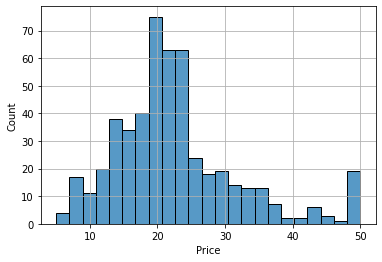

In [ ]:
# 그래프를 사용하여 Target의 분포 확인 (히스토그램)
sns.histplot(df['Price'])
plt.grid(True)
plt.show()

## 3.각 변수들 간 상관 관계 분석

In [ ]:
# np.corrcoef의 경우 행 단위로 df의 열을 주어야 하므로 T : Transpose를 사용함
# np.corrcoef (correlation coefficient)
# https://numpy.org/devdocs/reference/generated/numpy.corrcoef.html
np.corrcoef(df.T)

array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
         0.28994558, -0.38506394,  0.45562148, -0.38830461],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
         0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
        -0.39167855,  0.17552032, -0.41299457,  0.36044534],
       [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145,
        -0.39167585,  0.64477851, -0.70802699,  0.59512927,  0.72076018,
         0.38324756, -0.35697654,  0.60379972, -0.48372516],
       [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281,
         0.09125123,  0.08651777, -0.09917578, -0.00736824, -0.03558652,
        -0.12151517,  0.04878848, -0.0539293 ,  0.17526018],
       [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ,
        -0.30218819,  0.7314701 , -0.76923011,  0.61144056,  0.6680232 ,
         0.18893268, -0.38

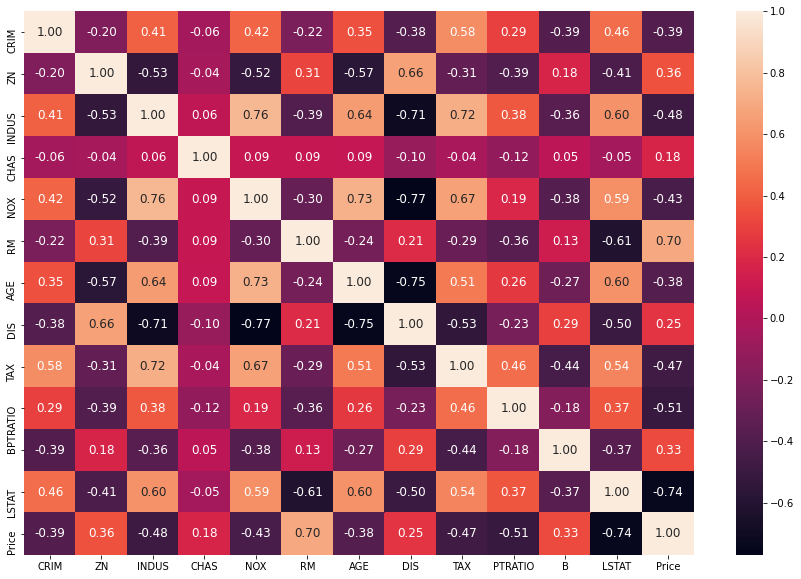

In [ ]:
#df.corr()
plt.figure(figsize=(15,10))
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size':12})
plt.show()

In [5]:
# 상관 관계가 매우 높은 중복 독립 변수 제거
# 'RAD'와 'TAX'간의 상관관계가 0.91로 매우 높기 때문에 독립적으로 보기 어렵다
# 두 변수 중에 'Price'와 상관 관계가 상대적으로 낮은 'RAD'를 제거한다.

df.drop('RAD', axis=1, inplace=True)
df.head(2)

# 'RAD'가 제거된 것을 확인한다

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.9,9.14,21.6


## 4.스케일링


In [6]:
# 입력 변수들을 dfX로 생성 
dfX = df.iloc[:, :-1]
dfX.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.9,9.14


In [7]:
# dfX를 StandardScaler()로 표준화 한 뒤, DataFrame으로 생성함
from sklearn.preprocessing import StandardScaler
scaledX = StandardScaler().fit_transform(dfX)
dfX_scaled = pd.DataFrame(scaledX, columns=dfX.columns)
dfX_scaled.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439


## 5.각 변수들 간 산점도 그래프 그리기

In [ ]:
# Seaborn 을 활용하여 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 산점도 매트릭스 그리기
sns.pairplot(df_scaled)

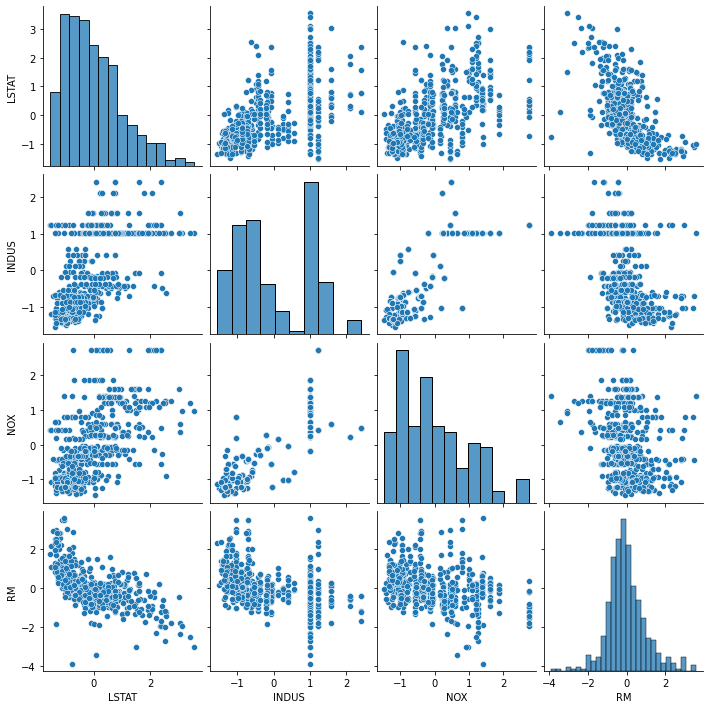

In [ ]:
# 전체에 대해 할 수 있지만, 몇 개의 columns에 대해 처리하여 본다
cols = ['LSTAT', 'INDUS', 'NOX', 'RM']
sns.pairplot(dfX_scaled[cols], height=2.5)
plt.show()

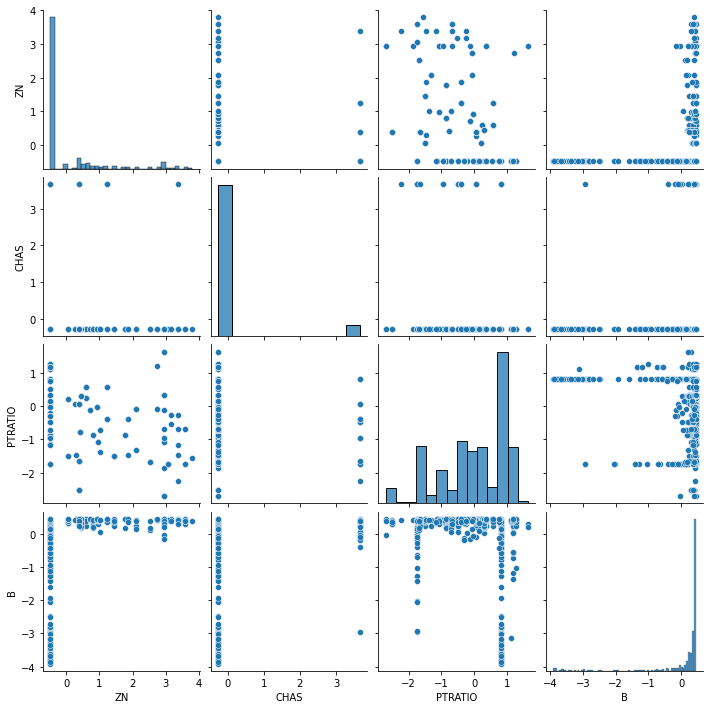

In [ ]:
# 전체에 대해 할 수 있지만, 몇 개의 columns에 대해 처리하여 본다
cols = ['ZN', 'CHAS', 'PTRATIO', 'B']
sns.pairplot(dfX_scaled[cols], height=2.5)
plt.show()

## 6.다항 변환
- 1차식으로 표현할 수 없는 변수 확인
- 표준화된 입력 변수로 PolynomialFeatures()로 2차 다항식 변환

In [9]:
# dfX_scaled에 대해서 2차 다항식으로 변환 하여 X_data로 저장
# boston.target을 y_target으로 저장
from sklearn.preprocessing import PolynomialFeatures
X_data = PolynomialFeatures(degree=2, include_bias=False).fit_transform(dfX_scaled)
y_target = boston.target
print(X_data.shape, dfX_scaled.shape)

(506, 90) (506, 12)


In [ ]:
# 왜 90개 일까?  a, a^2, b, b^2, c, c^2 ...   ab, ac, ad, ... bc, bd, ...  
sum(range(1, 13)) + 12

90

## 7.데이터 세트 분할

In [10]:
from sklearn.model_selection import train_test_split

# ndarray, DataFrame 어떤 것을 사용해도 되지만, 몇 몇 딥러닝은 ndarray만 사용해야 하는 것도 있음
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, random_state = 1)
print(X_train.shape, X_test.shape)


(379, 90) (127, 90)


## 8.모델학습 및 평가
- GridSearchCV를 이용해 alpha 값을 0~100 으로 변경하면서 Ridge 모델 학습 및 평가
- 평가 지표 : R2, MSE, RMSE, MAE

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

cv = GridSearchCV(estimator=Ridge(), param_grid={'alpha':range(0, 101)})
cv.fit(X_train, y_train)
display(pd.DataFrame(cv.cv_results_))
best = cv.best_estimator_

print('train r2 score:',best.score(X_train, y_train), 'test r2 score:', best.score(X_test, y_test))
pred = best.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('test mae :', mae, 'test mse:', mse, 'test rmse:', np.sqrt(mse))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006841,0.002915,0.000872,0.000074,0,{'alpha': 0},0.545897,0.756502,0.672970,0.831369,0.724696,0.706287,0.095227,101
1,0.001301,0.000044,0.001065,0.000596,1,{'alpha': 1},0.623731,0.791846,0.738278,0.875390,0.755707,0.756990,0.081662,100
2,0.001376,0.000029,0.000838,0.000017,2,{'alpha': 2},0.660374,0.803685,0.757428,0.884686,0.770893,0.775413,0.072550,99
3,0.001269,0.000089,0.000746,0.000040,3,{'alpha': 3},0.679149,0.810973,0.767281,0.886678,0.780331,0.784882,0.067161,75
4,0.001209,0.000018,0.000757,0.000045,4,{'alpha': 4},0.690099,0.816234,0.773751,0.886212,0.786818,0.790623,0.063557,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.001202,0.000019,0.000726,0.000021,96,{'alpha': 96},0.655292,0.835648,0.845404,0.774583,0.779864,0.778158,0.067733,94
97,0.001257,0.000063,0.000763,0.000018,97,{'alpha': 97},0.654819,0.835457,0.845420,0.773926,0.779416,0.777807,0.067880,95
98,0.001223,0.000023,0.000730,0.000015,98,{'alpha': 98},0.654349,0.835265,0.845431,0.773275,0.778969,0.777458,0.068026,96
99,0.001236,0.000031,0.000739,0.000020,99,{'alpha': 99},0.653881,0.835073,0.845438,0.772629,0.778523,0.777109,0.068170,97


train r2 score: 0.8991932878545684 test r2 score: 0.9086692414412318
test mae : 2.3270537790780623 test mse: 9.047085531629657 test rmse: 3.0078373512591496


## 9.총정리

In [ ]:
from sklearn.datasets import  load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.drop('RAD', axis=1, inplace=True)
dfX = df.iloc[:, :-1]
scaledX = StandardScaler().fit_transform(dfX)
dfX_scaled = pd.DataFrame(scaledX, columns=dfX.columns)
X_data = PolynomialFeatures(degree=2, include_bias=False).fit_transform(dfX_scaled)
y_target = boston.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, random_state = 1)

cv = GridSearchCV(estimator=Ridge(), param_grid={'alpha':range(0, 101)})
cv.fit(X_train, y_train)
display(pd.DataFrame(cv.cv_results_))
best = cv.best_estimator_

print('train r2 score:',best.score(X_train, y_train), 'test r2 score:', best.score(X_test, y_test))
pred = best.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
print('test mae :', mae, 'test mse:', mse, 'test rmse:', np.sqrt(mse))